https://geoservices.ign.fr/documentation/donnees/vecteur/bdtopo

https://geoservices.ign.fr/bdortho

## bdtopo

In [1]:
import rasterio
import numpy as np
import glob
import plotly.express as px
import plotly.graph_objs as go
import cv2
import pandas as pd
import geopandas as gpd

def load_tabfile(path):
    with open(path, 'r') as f:
        lines = f.readlines()

    coords = []
    for line in lines:
        if '(' in line and ')' in line:
            coord_str = line.split('(')[1].split(')')[0]
            coords.append(tuple(map(float, coord_str.split(','))))

    return rasterio.transform.from_bounds(*coords[0], *coords[2], len(coords[0]) // 2, len(coords) // 2)



paths = glob.glob(r'C:\Users\thoma\datascientest\2022_projects\20_jp2\BDORTHO\1_DONNEES_LIVRAISON_2018-03-00388\BDO_IRC_0M50_JP2-E080_UTM20W84GUAD_D977-2013\*.jp2')

def load_image(path):
    with rasterio.open(path) as src:
        value = np.transpose(src.read(), [1,2,0])
        resolution = src.res
        bounds = src.bounds
        
    
    transfrom = load_tabfile(path[:-3]+"tab")
    xrange = [bounds.left, bounds.right]
    yrange = [bounds.bottom, bounds.top]
    return value, xrange, yrange

# Load image 
value, xrange, yrange = load_image(paths[5])

In [2]:
value.max()

255

In [3]:
value.shape

(10000, 10000, 3)

In [4]:
def normalize_band(band, lower_percentile=2, upper_percentile=98):
    lower_value, upper_value = np.percentile(band, (lower_percentile, upper_percentile))
    return np.clip((band - lower_value) / (upper_value - lower_value), 0, 1)

value[...,0]=normalize_band(value[...,0])*255
value[...,1]=normalize_band(value[...,1])*255
value[...,2]=normalize_band(value[...,2])*255

In [5]:
value.max()

255

In [6]:
paths_shp =  glob.glob(r'C:\Users\thoma\datascientest\2022_projects\20_jp2\BDTOPO\1_DONNEES_LIVRAISON_2022-12-00159\BDT_3-3_SHP_RGAF09UTM20_D977-ED2022-12-15\*\*.shp')

def load_shp(path):
    # Load data
    bdtopo = gpd.read_file(path)
    # Add Category and Type
    bdtopo.insert(0, 'Category', path.split('\\')[-2])
#     bdtopo['Category'] = path.split('\\')[-2]
    bdtopo.insert(1, 'Type', path.split('\\')[-1][:-4])
#     bdtopo['Type'] = path.split('\\')[-1][:-4]
    return bdtopo

bdtopo = load_shp(paths_shp[0])

for path in paths_shp[1:]:
    bdtopo = bdtopo.append(load_shp(path))

bdtopo.reset_index(drop=True, inplace=True)
bdtopo

,Category,Type,CODE_SIREN,ID_AUT_ADM,DATE_CONF,DATE_APP,DATE_MAJ,DATE_CREAT,NOM,INSEE_REG,...,NOM_INIT,MOT_DIR,VALIDITE,CODE_INSEE,CODE_POST,ALIAS_INI,ALIAS_MIN,TYPE_LIAIS,Q_MAJ_MIN,FIABILITE
0,ADMINISTRATIF,COLLECTIVITE_TERRITORIALE,219711231,SURFACTI0000001170570471,None,None,2022-12-01 08:45:49,2018-11-24 00:00:00,Collectivité de Saint-Barthélemy,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BATI,BATIMENT,NaN,NaN,None,None,None,2019-05-24 21:58:18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BATI,BATIMENT,NaN,NaN,None,None,2021-06-14 16:22:20,2012-11-19 13:47:45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BATI,BATIMENT,NaN,NaN,None,None,None,2019-05-24 21:35:01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BATI,BATIMENT,NaN,NaN,None,None,2019-05-24 21:35:13,2008-01-11 05:44:42,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12184,TRANSPORT,VOIE_NOMMEE,NaN,NaN,NaN,NaN,2017-07-07 19:52:37,2016-09-21 15:06:31,NaN,NaN,...,RTE DE GRAND CUL-DE-SAC,sac,Oui,97701,97133,None,None,de,OK,9.0
12185,TRANSPORT,VOIE_NOMMEE,NaN,NaN,NaN,NaN,2019-04-25 19:03:09,2016-09-21 15:06:31,NaN,NaN,...,R DE LA SUEDE,suède,Oui,97701,97133,R DU PORT,rue du port/,de la,OK,9.0
12186,TRANSPORT,VOIE_NOMMEE,NaN,NaN,NaN,NaN,2019-05-27 19:04:11,2016-09-21 15:06:31,NaN,NaN,...,R DE SAINT-THOMAS,thomas,Oui,97701,97133,R DUQUESNE,rue duquesne/,de,OK,9.0
12187,ZONES_REGLEMENTEES,PARC_OU_RESERVE,NaN,NaN,NaN,NaN,2022-03-04 16:42:57,2012-12-18 15:58:13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
bdtopo.groupby(['Category','Type']).agg( count=('Type','count'), geometry=("geometry", 'first'))

count  \
Category              Type                                     
ADMINISTRATIF         COLLECTIVITE_TERRITORIALE            1   
BATI                  BATIMENT                          7825   
                      CIMETIERE                            5   
                      CONSTRUCTION_LINEAIRE              118   
                      CONSTRUCTION_PONCTUELLE             38   
                      LIGNE_OROGRAPHIQUE                  25   
                      RESERVOIR                           12   
                      TERRAIN_DE_SPORT                    20   
                      TOPONYMIE_BATI                       2   
HYDROGRAPHIE          COURS_D_EAU                         22   
                      DETAIL_HYDROGRAPHIQUE               37   
                      LIMITE_TERRE_MER                   444   
                      NOEUD_HYDROGRAPHIQUE                 3   
                      PLAN_D_EAU                           2   
                      SURFACE_HYDROGRAPHIQUE              35   
                      TOPONYMIE_HYDROGRAPHIE              27   
                      TRONCON_HYDROGRAPHIQUE             120   
LIEUX_NOMMES          DETAIL_OROGRAPHIQUE                 51   
                      TOPONYMIE_LIEUX_NOMMES             101   
                      ZONE_D_HABITATION                   46   
OCCUPATION_DU_SOL     ZONE_DE_VEGETATION                1262   
                      ZONE_D_ESTRAN                       22   
SERVICES_ET_ACTIVITES TOPONYMIE_SERVICES_ET_ACTIVITES     35   
                      ZONE_D_ACTIVITE_OU_D_INTERET        60   
TRANSPORT             AERODROME                            1   
                      EQUIPEMENT_DE_TRANSPORT             14   
                      ITINERAIRE_AUTRE                     2   
                      PISTE_D_AERODROME                    2   
                      POINT_DU_RESEAU                     13   
                      ROUTE_NUMEROTEE_OU_NOMMEE            4   
                      TOPONYMIE_TRANSPORT                  9   
                      TRONCON_DE_ROUTE                  1763   
                      VOIE_NOMMEE                         66   
ZONES_REGLEMENTEES    PARC_OU_RESERVE                      1   
                      TOPONYMIE_ZONES_REGLEMENTEES         1   

                                                                                                geometry  
Category              Type                                                                                
ADMINISTRATIF         COLLECTIVITE_TERRITORIALE        MULTIPOLYGON (((520033.500 1975900.900, 520026...  
BATI                  BATIMENT                         POLYGON Z ((515916.700 1980309.500 -1000.000, ...  
                      CIMETIERE                        POLYGON Z ((515634.800 1979560.100 4.700, 5155...  
                      CONSTRUCTION_LINEAIRE            LINESTRING Z (520076.700 1978189.200 -1000.000...  
                      CONSTRUCTION_PONCTUELLE                   POINT Z (516937.200 1978098.200 184.100)  
                      LIGNE_OROGRAPHIQUE               LINESTRING Z (519547.200 1979173.700 -1000.000...  
                      RESERVOIR                        POLYGON Z ((515668.100 1979403.500 5.000, 5156...  
                      TERRAIN_DE_SPORT                 POLYGON Z ((516884.300 1979283.300 -1000.000, ...  
                      TOPONYMIE_BATI                                      POINT (516144.000 1978614.700)  
HYDROGRAPHIE          COURS_D_EAU                      LINESTRING (514406.000 1981115.800, 514405.700...  
                      DETAIL_HYDROGRAPHIQUE                               POINT (516553.400 1980550.200)  
                      LIMITE_TERRE_MER                 LINESTRING (505724.000 1984931.900, 505726.700...  
                      NOEUD_HYDROGRAPHIQUE                    POINT Z (516743.800 1978860.300 -1000.000)  
                      PLAN_D_EAU                       POLYGON ((521319.200 19796

## LINESTRING ou LINESTRING Z  --> Line ou poly

In [8]:
a = bdtopo.groupby(['Category','Type']).first()['geometry'][3]
a.xy

(array('d', [520076.7, 520120.6, 520083.0, 520084.3, 520084.9]),
 array('d', [1978189.2, 1978125.8, 1978099.3, 1978095.6, 1978091.2]))

In [9]:
a.wkt

'LINESTRING Z (520076.7 1978189.2 -1000, 520120.6 1978125.8 -1000, 520083 1978099.3 -1000, 520084.3 1978095.6 -1000, 520084.9 1978091.2 -1000)'

## POINT ou POINT Z --> Scatter

In [10]:
a = bdtopo.groupby(['Category','Type']).first()['geometry'][-1]
a.xy

(array('d', [521227.24372664513]), array('d', [1980819.5]))

In [11]:
bdtopo.isna().mean()

Category      0.000000
Type          0.000000
CODE_SIREN    0.999918
ID_AUT_ADM    0.999918
DATE_CONF     0.807367
                ...   
ALIAS_INI     0.999344
ALIAS_MIN     0.999344
TYPE_LIAIS    0.996226
Q_MAJ_MIN     0.994585
FIABILITE     0.994585
Length: 161, dtype: float64

In [12]:
bdtopo.isna().mean()['geometry']

0.0

<AxesSubplot:>

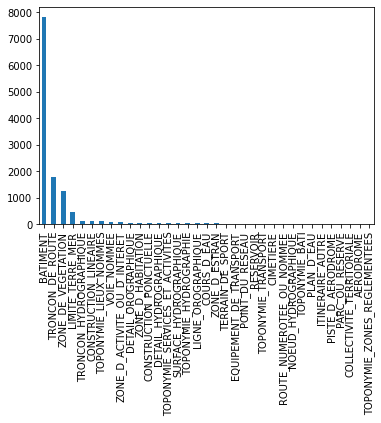

In [13]:
bdtopo.Type.value_counts().plot.bar()

In [14]:
import geopandas as gpd


map_size = [5000,5000]


def isInMap(xrange, yrange):
    def my_function(polynom):
        x, y = polynom.centroid.x, polynom.centroid.y
        if xrange[0]<x and xrange[1]>x and yrange[0]<y and yrange[1]>y:
            return True
        else :
            return False
        
    return my_function




def convert_centroid(map_size, xrange, yrange):
    def my_function(polygon):
        x, y = polygon.centroid.x, polygon.centroid.y
        x_new = (x - xrange[0])/(xrange[1]-xrange[0])*map_size[0]
        y_new = map_size[1] - (y - yrange[0])/(yrange[1]-yrange[0])*map_size[1]
        return [x_new, y_new]
    
    return my_function


def convert_polygon(map_size, xrange, yrange):
    def my_function(polygon):
        if polygon.wkt.lower()[:7]=="polygon":
            x, y = polygon.exterior.coords.xy
            x = x.tolist()
            y = y.tolist()
        elif polygon.wkt[:10]=="LINESTRING":
            x, y = polygon.coords.xy
            x = x.tolist()
            x += x[::-1]
            y = y.tolist()
            y += y[::-1]
        
        else :
            x = [1,2]
            y = [1,2]
        x = np.array(x)
        y = np.array(y) 
        x_new = (x - xrange[0])/(xrange[1]-xrange[0])*map_size[0]
        y_new = map_size[1] - (y - yrange[0])/(yrange[1]-yrange[0])*map_size[1]
        return [x_new, y_new]
    
    return my_function

def generate_xy_polygons(bdtopo_area):

    list_x = []
    for xpoly in bdtopo_area['xpolygon']:
        list_x.extend(xpoly.tolist() + [None])
    list_x = list_x[:-1]
    
    list_y = []
    for ypoly in bdtopo_area['ypolygon']:
        ypoly = map_size[1]-ypoly
        list_y.extend(ypoly.tolist() + [None])
    list_y = list_y[:-1]
    
    return list_x, list_y

def generate_x_polygons(xdata):
    list_x = []
    for xpoly in xdata:
        list_x.extend(xpoly.tolist() + [None])
    list_x = list_x[:-1]
    
    return list_x


bdtopo_zone = bdtopo[bdtopo['geometry'].apply(isInMap(xrange, yrange))].copy()
print('Avant :', bdtopo.shape, 'Après :', bdtopo_zone.shape)

bdtopo_zone['centroid'] = bdtopo_zone['geometry'].apply(convert_centroid(map_size, xrange, yrange))
bdtopo_zone['xcentroid'] = bdtopo_zone['centroid'].apply(lambda x : x[0])
bdtopo_zone['ycentroid'] = bdtopo_zone['centroid'].apply(lambda x : x[1])


bdtopo_point = bdtopo_zone[bdtopo['geometry'].apply(lambda x : x.wkt.lower()[:5]=="point")]

bdtopo_zone = bdtopo_zone[bdtopo_zone['geometry'].apply(lambda x : x.wkt.lower()[:7]=="polygon" or x.wkt[:10]=="LINESTRING")]


bdtopo_zone['polygon'] = bdtopo_zone['geometry'].apply(convert_polygon(map_size, xrange, yrange))
bdtopo_zone['xpolygon'] = bdtopo_zone['polygon'].apply(lambda x : x[0])
bdtopo_zone['ypolygon'] = bdtopo_zone['polygon'].apply(lambda x : x[1])

bdtopo_zone.head()

Avant : (12189, 161) Après : (6140, 161)


C:\Users\thoma\.conda\envs\tf\lib\site-packages\geopandas\geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


,Category,Type,CODE_SIREN,ID_AUT_ADM,DATE_CONF,DATE_APP,DATE_MAJ,DATE_CREAT,NOM,INSEE_REG,...,ALIAS_MIN,TYPE_LIAIS,Q_MAJ_MIN,FIABILITE,centroid,xcentroid,ycentroid,polygon,xpolygon,ypolygon
2,BATI,BATIMENT,NaN,NaN,None,None,2021-06-14 16:22:20,2012-11-19 13:47:45,NaN,NaN,...,NaN,NaN,NaN,NaN,"[3597.8348698652117, 248.10123340645805]",3597.834870,248.101233,"[[3607.7000000000116, 3592.2000000000116, 3587...","[3607.7000000000116, 3592.2000000000116, 3587....","[245.0, 256.30000000004657, 250.80000000004657..."
3,BATI,BATIMENT,NaN,NaN,None,None,None,2019-05-24 21:35:01,NaN,NaN,...,NaN,NaN,NaN,NaN,"[3606.6101467936533, 133.64899991452694]",3606.610147,133.649000,"[[3605.0999999999767, 3610.2999999999884, 3608...","[3605.0999999999767, 3610.2999999999884, 3608....","[129.39999999990687, 131.19999999995343, 137.8..."
4,BATI,BATIMENT,NaN,NaN,None,None,2019-05-24 21:35:13,2008-01-11 05:44:42,NaN,NaN,...,NaN,NaN,NaN,NaN,"[3761.2261521971086, 134.73515541269444]",3761.226152,134.735155,"[[3768.0000000000005, 3766.5999999999767, 3754...","[3768.0000000000005, 3766.5999999999767, 3754....","[133.10000000009313, 138.89999999990687, 136.5..."
7,BATI,BATIMENT,NaN,NaN,None,None,2019-05-24 21:36:07,2012-11-19 13:48:09,NaN,NaN,...,NaN,NaN,NaN,NaN,"[4256.264101736771, 89.13475291710347]",4256.264102,89.134753,"[[4251.200000000012, 4253.799999999988, 4253.9...","[4251.200000000012, 4253.799999999988, 4253.90...","[87.0, 87.0, 85.60000000009313, 85.60000000009..."
13,BATI,BATIMENT,NaN,NaN,None,None,2019-05-24 21:55:13,2012-11-19 13:42:29,NaN,NaN,...,NaN,NaN,NaN,NaN,"[724.5824638032936, 1277.321507724701]",724.582464,1277.321508,"[[721.5000000000001, 724.2999999999885, 727.70...","[721.5000000000001, 724.2999999999885, 727.700...","[1276.3999999999069, 1273.8999999999069, 1278...."


In [15]:
bdtopo_zone_agregate = bdtopo_zone.groupby('Type').agg({'xpolygon':list, 'ypolygon':list})

bdtopo_zone_agregate['xpolygon_ready'] = bdtopo_zone_agregate['xpolygon'].apply(generate_x_polygons)
bdtopo_zone_agregate['ypolygon_ready'] = bdtopo_zone_agregate['ypolygon'].apply(generate_x_polygons)
bdtopo_zone_agregate

,xpolygon,ypolygon,xpolygon_ready,ypolygon_ready
Type,,,,
AERODROME,"[[1235.5, 1274.9000000000233, 1371.0, 1427.599...","[[299.89999999990687, 320.0, 317.8999999999068...","[1235.5, 1274.9000000000233, 1371.0, 1427.5999...","[299.89999999990687, 320.0, 317.89999999990687..."
BATIMENT,"[[3607.7000000000116, 3592.2000000000116, 3587...","[[245.0, 256.30000000004657, 250.8000000000465...","[3607.7000000000116, 3592.2000000000116, 3587....","[245.0, 256.30000000004657, 250.80000000004657..."
CIMETIERE,"[[634.7999999999882, 589.0999999999767, 600.09...","[[439.89999999990687, 376.5, 367.8999999999068...","[634.7999999999882, 589.0999999999767, 600.099...","[439.89999999990687, 376.5, 367.89999999990687..."
CONSTRUCTION_LINEAIRE,"[[5006.299999999988, 5003.099999999977, 5000.5...","[[1778.8000000000466, 1780.0, 1782.00000000000...","[5006.299999999988, 5003.099999999977, 5000.59...","[1778.8000000000466, 1780.0, 1782.000000000000..."
COURS_D_EAU,"[[4238.5, 4226.5, 4212.299999999988, 4202.7999...","[[638.1999999999534, 656.1000000000931, 669.30...","[4238.5, 4226.5, 4212.299999999988, 4202.79999...","[638.1999999999534, 656.1000000000931, 669.300..."
EQUIPEMENT_DE_TRANSPORT,"[[908.4000000000232, 908.4000000000232, 903.40...","[[1421.3000000000466, 1426.3000000000466, 1426...","[908.4000000000232, 908.4000000000232, 903.400...","[1421.3000000000466, 1426.3000000000466, 1426...."
LIGNE_OROGRAPHIQUE,"[[4547.200000000012, 4564.900000000023, 4577.9...","[[826.3000000000466, 814.1999999999534, 806.80...","[4547.200000000012, 4564.900000000023, 4577.90...","[826.3000000000466, 814.1999999999534, 806.800..."
LIMITE_TERRE_MER,"[[754.7000000000116, 752.9000000000233, 750.20...","[[1557.6000000000931, 1557.3000000000466, 1557...","[754.7000000000116, 752.9000000000233, 750.200...","[1557.6000000000931, 1557.3000000000466, 1557...."
PISTE_D_AERODROME,"[[1354.0999999999767, 1346.0999999999767, 1342...","[[435.0, 428.39999999990687, 424.1999999999534...","[1354.0999999999767, 1346.0999999999767, 1342....","[435.0, 428.39999999990687, 424.19999999995343..."


In [16]:
bdtopo_point_agregate = bdtopo_point.groupby('Type').agg({'xcentroid':list, 'ycentroid':list})

bdtopo_point_agregate

,xcentroid,ycentroid
Type,,
CONSTRUCTION_PONCTUELLE,"[1937.2000000000116, 1144.0, 2367.0, 745.09999...","[1901.8000000000466, 1385.3000000000466, 1771...."
DETAIL_HYDROGRAPHIQUE,"[778.9000000000233, 475.4000000000233, 106.400...","[1606.8999999999069, 502.80000000004657, 8.800..."
DETAIL_OROGRAPHIQUE,"[3013.4000000000233, 191.40000000002328, 1920....","[1132.8000000000466, 1413.8000000000466, 3042...."
NOEUD_HYDROGRAPHIQUE,"[1743.7999999999884, 1784.5]","[1139.6999999999534, 548.1000000000931]"
POINT_DU_RESEAU,"[2775.7999999999884, 901.0999999999768, 1497.2...","[470.30000000004657, 1101.3999999999069, 508.3..."
TOPONYMIE_BATI,"[1144.0, 745.0999999999767]","[1385.3000000000466, 751.0]"
TOPONYMIE_HYDROGRAPHIE,"[475.4000000000233, 778.9000000000233, 3955.40...","[502.80000000004657, 1606.8999999999069, 2406...."
TOPONYMIE_LIEUX_NOMMES,"[3738.4000000000233, 1013.0999999999766, 2179....","[723.8000000000466, 1642.6999999999534, 3166.8..."
TOPONYMIE_SERVICES_ET_ACTIVITES,"[587.4000000000233, 520.8153780068969, 520.815...","[662.3000000000466, 1182.9500000001863, 1182.9..."


In [2]:
def show_map(value, scatters_data, scatters_list_name, points_data, points_list_name):
    image = px.imshow(cv2.resize(value, (5000,5000)))
    
    points = []
    
    for i, (list_x, list_y) in enumerate(scatters_data):
        # Ajouter des points
        point = go.Scatter(
            x=list_x,
            y=list_y,
            fill="toself",
            name=scatters_list_name[i],
        #     fillcolor="blue"

        )
        points.append(point)
        
    for i, (list_x, list_y) in enumerate(points_data):
        # Ajouter des points
        point = go.Scatter(
            x=list_x,
            y=list_y,
            mode='markers',
            marker=dict( size=5),
            name=points_list_name[i]
        )
        points.append(point)

    # Créer la figure
    fig = go.Figure(data=[image.data[0]]+points)
    
    fig.update_xaxes(range=[0,5000])
    fig.update_yaxes(range=[0,5000])
    
    fig.update_layout(
        autosize=False,
        width=1000,
        height=800,)

    # Afficher la figure
    fig.show()

    

show_map(value, bdtopo_zone_agregate[['xpolygon_ready', 'ypolygon_ready']].values, bdtopo_zone_agregate.index, bdtopo_point_agregate[['xcentroid', 'ycentroid']].values, bdtopo_point_agregate.index)

In [18]:
data_mask = [list(zip(bdtopo_zone_agregate['xpolygon']['BATIMENT'][i], bdtopo_zone_agregate['ypolygon']['BATIMENT'][i])) for i in range(len(bdtopo_zone_agregate['xpolygon']['BATIMENT'])) ]

In [19]:
import numpy
from PIL import Image, ImageDraw
width, height = 5000,5000
# polygon = [(x1,y1),(x2,y2),...] or [x1,y1,x2,y2,...]

img = Image.new('L', (width, height), 0)
for p in data_mask :
    ImageDraw.Draw(img).polygon(p, outline=1, fill=1)

mask = numpy.array(img)

In [1]:
px.imshow(cv2.resize(mask, (5000,5000)))
# plt.imshow(mask)